In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Column Names
I would like to have years as the column names for all dataframes. The website contains life expectancy from 1990 to 2019.

In [14]:
column_names = [year for year in range(1990, 2020)]

column_names = ['Region'] + column_names
print(column_names)

['Region', 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


### Create DataFrame 1: United States

In [15]:
#pull in website's source code for United States
url_us = 'https://globaldatalab.org/shdi/lifexp/USA/?levels=1%2B4&interpolation=0&extrapolation=0&nearest_real=0&colour_scales=national'

page_us = requests.get(url_us)
soup_us = BeautifulSoup(page_us.text, 'html.parser')

In [16]:
#extract the table
table = soup_us.find('tbody')

rows = table.find_all('tr')

In [17]:
temp = []
for row in rows:
    infos = row.find_all('td')
    temp.append(infos)

In [18]:
final_list = []
for elements in temp:
    row = []
    for element in elements:
        row.append(element.get_text().strip())
    final_list.append(row)

print(final_list)

[[], ['Total', '75.20', '75.40', '75.60', '75.70', '75.90', '76.10', '76.20', '76.40', '76.50', '76.70', '76.80', '77.00', '77.10', '77.30', '77.50', '77.70', '77.90', '78.10', '78.30', '78.50', '78.70', '78.80', '78.90', '78.90', '78.90', '78.90', '78.90', '78.90', '78.90', '78.90'], ['Alabama', '73.54', '73.65', '73.76', '73.77', '73.88', '73.99', '74.00', '74.11', '74.12', '74.23', '74.25', '74.35', '74.37', '74.47', '74.58', '74.69', '74.82', '74.95', '75.08', '75.21', '75.34', '75.40', '75.47', '75.43', '75.40', '75.40', '75.40', '75.40', '75.40', '75.40'], ['Alaska', '75.70', '75.83', '75.96', '75.99', '76.12', '76.25', '76.30', '76.45', '76.50', '76.65', '76.70', '76.92', '77.04', '77.26', '77.48', '77.70', '77.80', '77.90', '78.00', '78.10', '78.20', '78.27', '78.35', '78.32', '78.30', '78.30', '78.30', '78.30', '78.30', '78.30'], ['Arizona', '76.10', '76.26', '76.42', '76.48', '76.64', '76.80', '76.87', '77.04', '77.11', '77.28', '77.35', '77.53', '77.61', '77.79', '77.97', '7

In [19]:
le_us = pd.DataFrame(final_list[1:], columns = column_names)
le_us.head()

,Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total,75.20,75.40,75.60,75.70,75.90,76.10,76.20,76.40,76.50,...,78.70,78.80,78.90,78.90,78.90,78.90,78.90,78.90,78.90,78.90
1,Alabama,73.54,73.65,73.76,73.77,73.88,73.99,74.00,74.11,74.12,...,75.34,75.40,75.47,75.43,75.40,75.40,75.40,75.40,75.40,75.40
2,Alaska,75.70,75.83,75.96,75.99,76.12,76.25,76.30,76.45,76.50,...,78.20,78.27,78.35,78.32,78.30,78.30,78.30,78.30,78.30,78.30
3,Arizona,76.10,76.26,76.42,76.48,76.64,76.80,76.87,77.04,77.11,...,79.50,79.58,79.65,79.63,79.60,79.60,79.60,79.60,79.60,79.60
4,Arkansas,74.20,74.31,74.41,74.42,74.53,74.64,74.66,74.78,74.80,...,75.99,76.04,76.09,76.05,76.00,76.00,76.00,76.00,76.00,76.00


In [20]:
#convert all ages to float
cols = [i for i in le_us.columns if i != 'Region']
for col in cols:
    le_us[col] = le_us[col].astype('float')
    
le_us.head()

,Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total,75.20,75.40,75.60,75.70,75.90,76.10,76.20,76.40,76.50,...,78.70,78.80,78.90,78.90,78.9,78.9,78.9,78.9,78.9,78.9
1,Alabama,73.54,73.65,73.76,73.77,73.88,73.99,74.00,74.11,74.12,...,75.34,75.40,75.47,75.43,75.4,75.4,75.4,75.4,75.4,75.4
2,Alaska,75.70,75.83,75.96,75.99,76.12,76.25,76.30,76.45,76.50,...,78.20,78.27,78.35,78.32,78.3,78.3,78.3,78.3,78.3,78.3
3,Arizona,76.10,76.26,76.42,76.48,76.64,76.80,76.87,77.04,77.11,...,79.50,79.58,79.65,79.63,79.6,79.6,79.6,79.6,79.6,79.6
4,Arkansas,74.20,74.31,74.41,74.42,74.53,74.64,74.66,74.78,74.80,...,75.99,76.04,76.09,76.05,76.0,76.0,76.0,76.0,76.0,76.0


In [21]:
le_us['region_mean'] = le_us.drop('Region', axis=1).apply(lambda x: x.mean(), axis=1)
le_us.head()

,Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,region_mean
0,Total,75.20,75.40,75.60,75.70,75.90,76.10,76.20,76.40,76.50,...,78.80,78.90,78.90,78.9,78.9,78.9,78.9,78.9,78.9,77.486667
1,Alabama,73.54,73.65,73.76,73.77,73.88,73.99,74.00,74.11,74.12,...,75.40,75.47,75.43,75.4,75.4,75.4,75.4,75.4,75.4,74.662000
2,Alaska,75.70,75.83,75.96,75.99,76.12,76.25,76.30,76.45,76.50,...,78.27,78.35,78.32,78.3,78.3,78.3,78.3,78.3,78.3,77.319667
3,Arizona,76.10,76.26,76.42,76.48,76.64,76.80,76.87,77.04,77.11,...,79.58,79.65,79.63,79.6,79.6,79.6,79.6,79.6,79.6,78.155333
4,Arkansas,74.20,74.31,74.41,74.42,74.53,74.64,74.66,74.78,74.80,...,76.04,76.09,76.05,76.0,76.0,76.0,76.0,76.0,76.0,75.317667


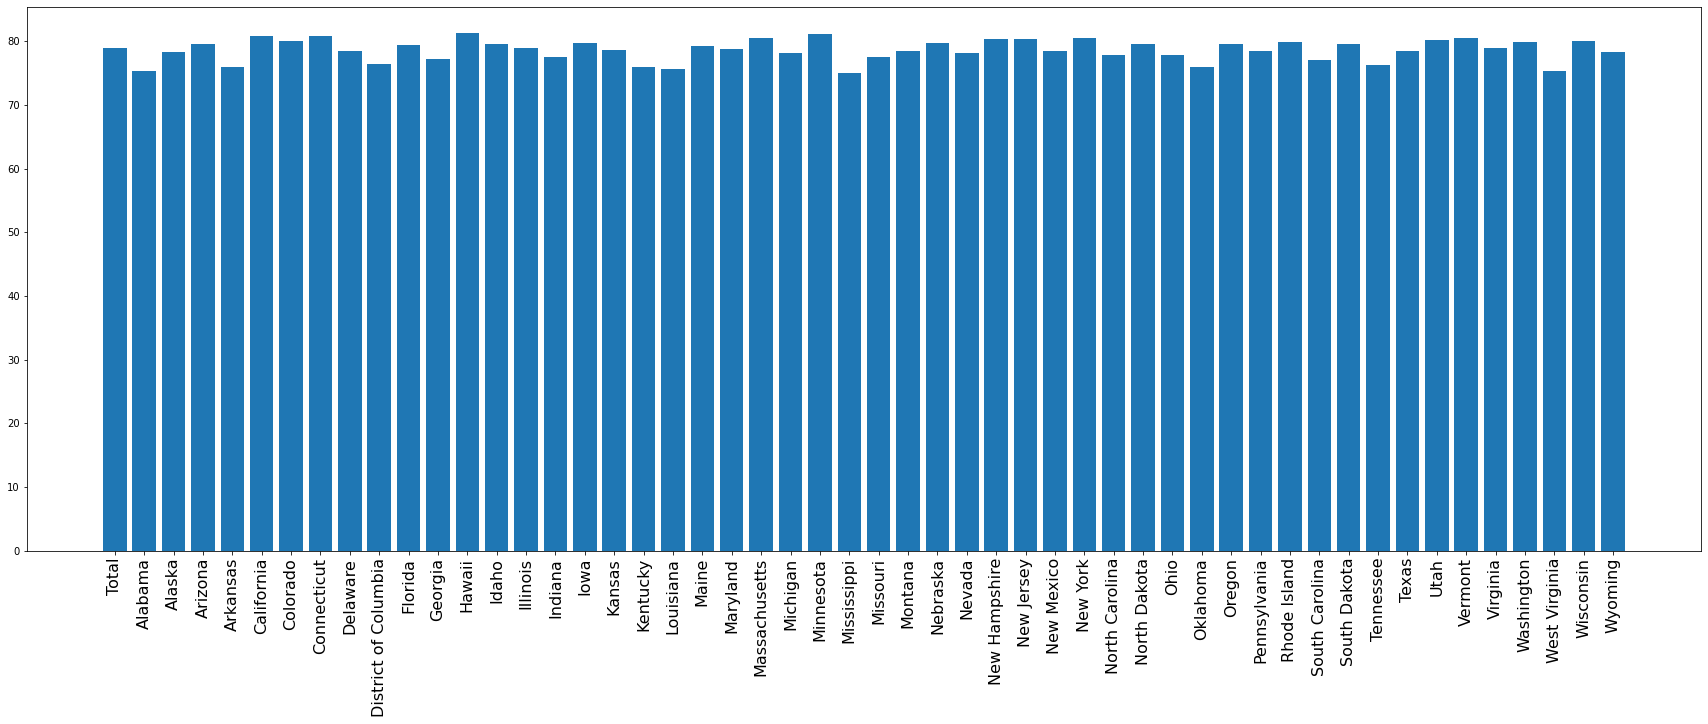

In [22]:
#plot a bar graph to for life expectancy of 2019 in each state
plt.figure(figsize=(30, 10))
ax = plt.subplot()
plt.bar(le_us['Region'], le_us[2019])
ax.set_xticks(range(len(le_us)))
ax.set_xticklabels(le_us['Region'], rotation=90, fontsize=16)
plt.show()

From the bar graph above, I conclude that there is no big difference among life expectancies of the states in the US. The longest life expectancy is Minnesota.

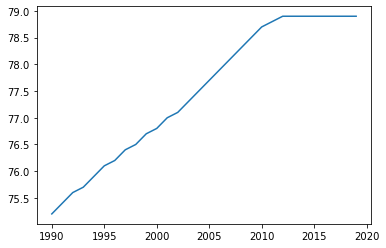

In [23]:
#plot a line graph of total life expectancy from 1990 to 2019
plt.clf()

total_us = [num for num in le_us.loc[0]]
total_us = total_us[1:-1]

years = [year for year in range(1990, 2020)]

plt.plot(years, total_us)
plt.show()

From the graph above, we can see that total life expectancy increases from 1990 to around 2014 and has stayed the same since. 

### Create DataFrame 2: China

In [24]:
def create_dataframe(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    table = soup.find('tbody')
    rows = table.find_all('tr')
    
    output = []
    temp = []
    for row in rows:
        temp.append(row.find_all('td'))
        
    for elements in temp:
        row = []
        for element in elements:
            row.append(element.get_text().strip())
        output.append(row)
        
    df = pd.DataFrame(output[1:], columns = column_names)
    return df

In [25]:
url_china = 'https://globaldatalab.org/shdi/lifexp/CHN/?levels=1%2B4&interpolation=0&extrapolation=0&nearest_real=0&colour_scales=national'

le_china = create_dataframe(url_china)
le_china.head()

,Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total,69.10,69.20,69.40,69.50,69.70,69.90,70.10,70.40,70.70,...,74.40,74.70,75.00,75.30,75.60,75.90,76.20,76.50,76.70,76.90
1,Anhui,69.81,69.86,70.00,70.05,70.20,70.35,70.49,70.74,70.99,...,74.24,74.54,74.84,75.14,75.44,75.74,76.04,76.34,76.54,76.74
2,Beijing,73.21,73.33,73.56,73.68,73.91,74.14,74.37,74.71,75.05,...,79.28,79.60,79.92,80.24,80.56,80.88,81.20,81.52,81.73,81.95
3,Chongqing,72.07,71.87,71.78,71.59,71.50,71.41,71.32,71.33,71.34,...,74.85,75.16,75.46,75.76,76.06,76.36,76.66,76.97,77.17,77.37
4,Fujian,68.90,69.11,69.42,69.62,69.93,70.24,70.55,70.96,71.37,...,74.91,75.22,75.52,75.82,76.12,76.42,76.73,77.03,77.23,77.43


In [26]:
#convert all numbers into float
cols = [i for i in le_china.columns if i != 'Region']
for col in cols:
    le_china[col] = le_china[col].astype('float')

In [27]:
total_china = [num for num in le_china.loc[0] if num != 'Total']
print(total_china)
print(total_us)

[69.1, 69.2, 69.4, 69.5, 69.7, 69.9, 70.1, 70.4, 70.7, 71.1, 71.4, 71.7, 72.1, 72.4, 72.7, 73.0, 73.3, 73.6, 73.8, 74.1, 74.4, 74.7, 75.0, 75.3, 75.6, 75.9, 76.2, 76.5, 76.7, 76.9]
[75.2, 75.4, 75.6, 75.7, 75.9, 76.1, 76.2, 76.4, 76.5, 76.7, 76.8, 77.0, 77.1, 77.3, 77.5, 77.7, 77.9, 78.1, 78.3, 78.5, 78.7, 78.8, 78.9, 78.9, 78.9, 78.9, 78.9, 78.9, 78.9, 78.9]


<Figure size 432x288 with 0 Axes>

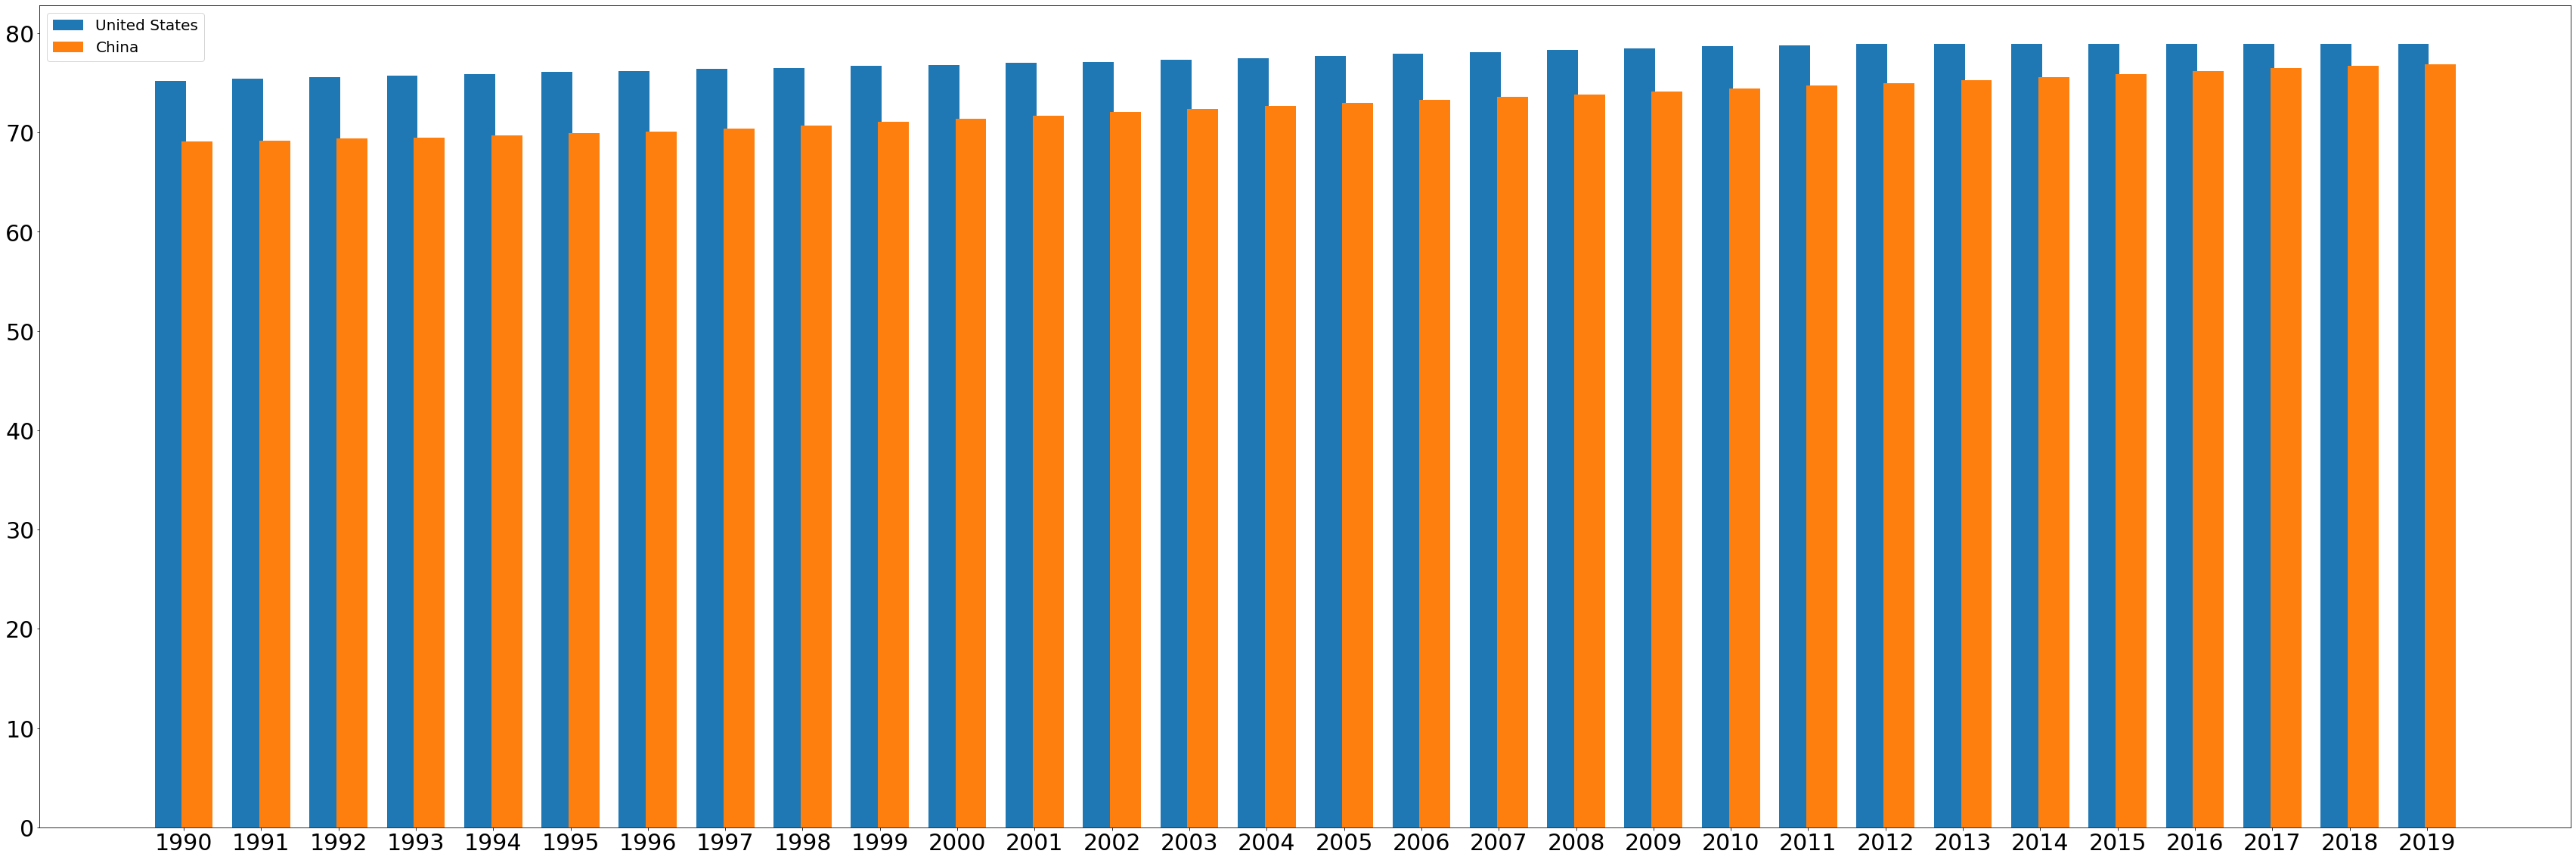

In [28]:
# Matplotlib side-by-side bar chart: US and China total life expectancy comparison from 1990 to 2019
plt.clf()

plt.figure(figsize=(60, 20))
#US
n = 1
t = 2
d = len(total_us)
w = 0.3
x_us = [t*element + w*n for element in range(d)]

plt.bar(x_us, total_us, label='United States')

#China
n = 2
t = 2
d = len(total_us)
w = 0.5
x_china = [t*element + w*n for element in range(d)]

plt.bar(x_china, total_china, label='China')

x_ticks = [(x1 + x2) / 2 for x1, x2 in zip(x_us, x_china)]
plt.xticks(x_ticks, years, fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)

plt.show()

From the graph above, we can see that total life expectancies of the United States from 1990 to 2019 are continuously longer than the total life expectancies in China. However, the difference is becoming smaller every year.

### Create DataFrame 3: United Kingdom

In [56]:
url_uk = 'https://globaldatalab.org/shdi/lifexp/GBR/?levels=1%2B4&interpolation=0&extrapolation=0&nearest_real=0&colour_scales=national'

page_uk = requests.get(url_uk)
soup_uk = BeautifulSoup(page_uk.text, 'html.parser')

In [57]:
table_uk = soup_uk.find('tbody')
rows_uk = table_uk.find_all('tr')

output_uk = []
temp_uk = []
for row in rows_uk:
    temp_uk.append(row.find_all('td'))

for elements in temp_uk:
    infos = []
    for element in elements:
        infos.append(element.get_text().strip())
    output_uk.append(infos)

le_uk = pd.DataFrame(output_uk[1:], columns=column_names)
le_uk

,Region,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total,75.70,75.90,76.10,76.30,76.50,76.70,76.90,77.10,77.30,...,80.40,80.60,80.70,80.90,81.00,81.10,81.10,81.20,81.20,81.30
1,East Midlands,75.64,75.84,76.04,76.24,76.48,76.66,76.85,77.03,77.22,...,80.64,80.86,80.97,81.01,81.02,81.03,81.14,81.14,81.01,81.11
2,East of England,76.69,76.89,77.09,77.29,77.41,77.64,77.88,78.11,78.35,...,81.52,81.79,81.82,81.91,81.92,82.13,82.01,82.08,82.02,82.12
3,London,81.40,81.62,81.83,82.05,81.60,81.67,81.75,81.83,81.91,...,82.12,81.93,82.06,82.08,82.12,82.10,82.60,82.71,82.74,82.84
4,North East,74.13,74.32,74.52,74.72,75.04,75.27,75.50,75.74,75.97,...,79.51,79.49,79.76,79.79,79.37,79.80,79.68,79.88,79.72,79.82
5,North West,74.32,74.51,74.71,74.90,75.17,75.35,75.52,75.70,75.87,...,79.30,79.54,79.67,79.75,79.75,79.96,79.78,80.02,80.12,80.21
6,Northern Ireland,74.87,75.06,75.26,75.46,75.54,75.79,76.04,76.29,76.54,...,79.62,80.13,80.16,80.17,80.40,80.53,80.90,80.46,80.77,80.87
7,Scotland,75.37,75.57,75.77,75.97,75.55,75.62,75.70,75.77,75.84,...,78.54,78.62,78.80,79.11,79.24,79.20,79.09,78.90,79.13,79.23
8,South East,76.76,76.97,77.17,77.37,77.60,77.81,78.02,78.23,78.44,...,81.71,81.95,82.02,81.98,82.16,82.39,82.28,82.35,82.50,82.60
9,South West,77.18,77.39,77.59,77.79,77.98,78.15,78.32,78.49,78.66,...,81.70,81.79,81.85,81.69,82.05,82.00,81.77,82.11,82.01,82.12


In [58]:
#convert all numbers into float type
cols = [col for col in le_uk.columns if col != 'Region']
for col in cols:
    le_uk[col] = le_uk[col].astype('float')

In [59]:
le_uk = le_uk.transpose().reset_index()
le_uk.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Region,Total,East Midlands,East of England,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
1,1990,75.7,75.64,76.69,81.4,74.13,74.32,74.87,75.37,76.76,77.18,75.4,75.31,75.27
2,1991,75.9,75.84,76.89,81.62,74.32,74.51,75.06,75.57,76.97,77.39,75.59,75.51,75.47
3,1992,76.1,76.04,77.09,81.83,74.52,74.71,75.26,75.77,77.17,77.59,75.79,75.71,75.67
4,1993,76.3,76.24,77.29,82.05,74.72,74.9,75.46,75.97,77.37,77.79,75.99,75.91,75.86


In [61]:
le_uk.columns=['Year', 'Total', 'East Midlands', 'East of England', 'London', 'North East', 'North West', 'Northern Ireland', 'Scotland', 'South East', 'South West', 'Wales', 'West Midlands', 'Yorkshire and The Humber']
le_uk.head()

,Year,Total,East Midlands,East of England,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
0,Region,Total,East Midlands,East of England,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
1,1990,75.7,75.64,76.69,81.4,74.13,74.32,74.87,75.37,76.76,77.18,75.4,75.31,75.27
2,1991,75.9,75.84,76.89,81.62,74.32,74.51,75.06,75.57,76.97,77.39,75.59,75.51,75.47
3,1992,76.1,76.04,77.09,81.83,74.52,74.71,75.26,75.77,77.17,77.59,75.79,75.71,75.67
4,1993,76.3,76.24,77.29,82.05,74.72,74.9,75.46,75.97,77.37,77.79,75.99,75.91,75.86


In [62]:
le_uk = le_uk.drop([0], axis=0)
le_uk.head()

,Year,Total,East Midlands,East of England,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
1,1990,75.7,75.64,76.69,81.4,74.13,74.32,74.87,75.37,76.76,77.18,75.4,75.31,75.27
2,1991,75.9,75.84,76.89,81.62,74.32,74.51,75.06,75.57,76.97,77.39,75.59,75.51,75.47
3,1992,76.1,76.04,77.09,81.83,74.52,74.71,75.26,75.77,77.17,77.59,75.79,75.71,75.67
4,1993,76.3,76.24,77.29,82.05,74.72,74.9,75.46,75.97,77.37,77.79,75.99,75.91,75.86
5,1994,76.5,76.48,77.41,81.6,75.04,75.17,75.54,75.55,77.6,77.98,76.2,76.09,75.98


In [63]:
le_uk_total = le_uk[['Year', 'Total']]
le_uk_total

,Year,Total
1,1990,75.7
2,1991,75.9
3,1992,76.1
4,1993,76.3
5,1994,76.5
6,1995,76.7
7,1996,76.9
8,1997,77.1
9,1998,77.3
10,1999,77.5


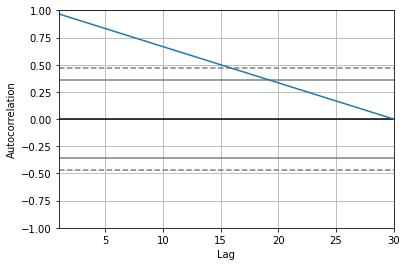

In [64]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(le_uk_total)
plt.show()

The graph above shows that there is no correlation between years and life expectancy.